In [1]:
import pandas as pd
from pyfolio.timeseries import perf_stats
%matplotlib inline

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/backtest_2019-11-07_17-05.csv')
df['realizedPNL_net'] = df['realizedPNL'] - 3.02
df['cumsum'] = df.realizedPNL_net.cumsum()
df['result'] = 100000 + df['cumsum']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 00:50:00,2019-11-07 17:08:06.388268,NQZ9,SELL,1,6304.175,[1],1,entry,1,1.3,USD,0.0,2019-11-07 17:08:06.388621,-3.02,-3.02,99996.98
2018-02-09 00:58:00,2019-11-07 17:08:06.420664,NKDZ9,SELL,1,21102.500,[2],3,entry,2,1.3,USD,0.0,2019-11-07 17:08:06.420898,-3.02,-6.04,99993.96
2018-02-09 01:12:00,2019-11-07 17:08:06.511802,GCZ9,BUY,1,1323.830,[3],5,entry,3,1.3,USD,0.0,2019-11-07 17:08:06.512038,-3.02,-9.06,99990.94
2018-02-09 01:15:00,2019-11-07 17:08:06.513828,NQZ9,BUY,1,6346.150,[4],2,stop-out,4,1.3,USD,-839.5,2019-11-07 17:08:06.513884,-842.52,-851.58,99148.42
2018-02-09 01:16:00,2019-11-07 17:08:06.514725,NKDZ9,BUY,1,21230.000,[5],4,stop-out,5,1.3,USD,-637.5,2019-11-07 17:08:06.514772,-640.52,-1492.10,98507.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01 13:37:00,2019-11-07 20:43:27.790208,CLZ9,BUY,1,54.842,[7929],9082,entry,7929,1.3,USD,0.0,2019-11-07 20:43:27.791955,-3.02,53146.65,153146.65
2019-11-01 13:39:00,2019-11-07 20:43:28.013105,ESZ9,BUY,1,3048.725,[7930],9084,entry,7930,1.3,USD,0.0,2019-11-07 20:43:28.014858,-3.02,53143.63,153143.63
2019-11-01 14:36:00,2019-11-07 20:43:31.996491,YM DEC 19,BUY,1,27132.100,[7931],9086,entry,7931,1.3,USD,0.0,2019-11-07 20:43:31.998295,-3.02,53140.61,153140.61


In [3]:
len(df)

7933

In [4]:
df.realizedPNL.sum()

76804.23000000001

In [5]:
df.realizedPNL_net.sum()

52846.57000000003

In [6]:
returns = pd.DataFrame()
returns['dollars'] = df['result'].resample('D').last()
returns.loc[returns.index[0] - pd.Timedelta(days=1), 'dollars'] = 100000
returns.sort_index(inplace=True)
returns.dollars.fillna(method='ffill', inplace=True)
returns['returns'] = returns['dollars'].pct_change()
returns

,dollars,returns
time,,
2018-02-08,100000.00,NaN
2018-02-09,87726.38,-0.122736
2018-02-10,87726.38,0.000000
2018-02-11,87726.38,0.000000
2018-02-12,85462.11,-0.025811
...,...,...
2019-10-28,143538.19,-0.003624
2019-10-29,147261.18,0.025937
2019-10-30,147644.11,0.002600


In [7]:
perf_stats(returns['returns'])

Annual return          0.184320
Cumulative returns     0.528466
Annual volatility      0.397209
Sharpe ratio           0.618994
Calmar ratio           0.719816
Stability              0.769397
Max drawdown          -0.256065
Omega ratio            1.148140
Sortino ratio          1.149374
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.476952
Daily value at risk   -0.049068
dtype: float64

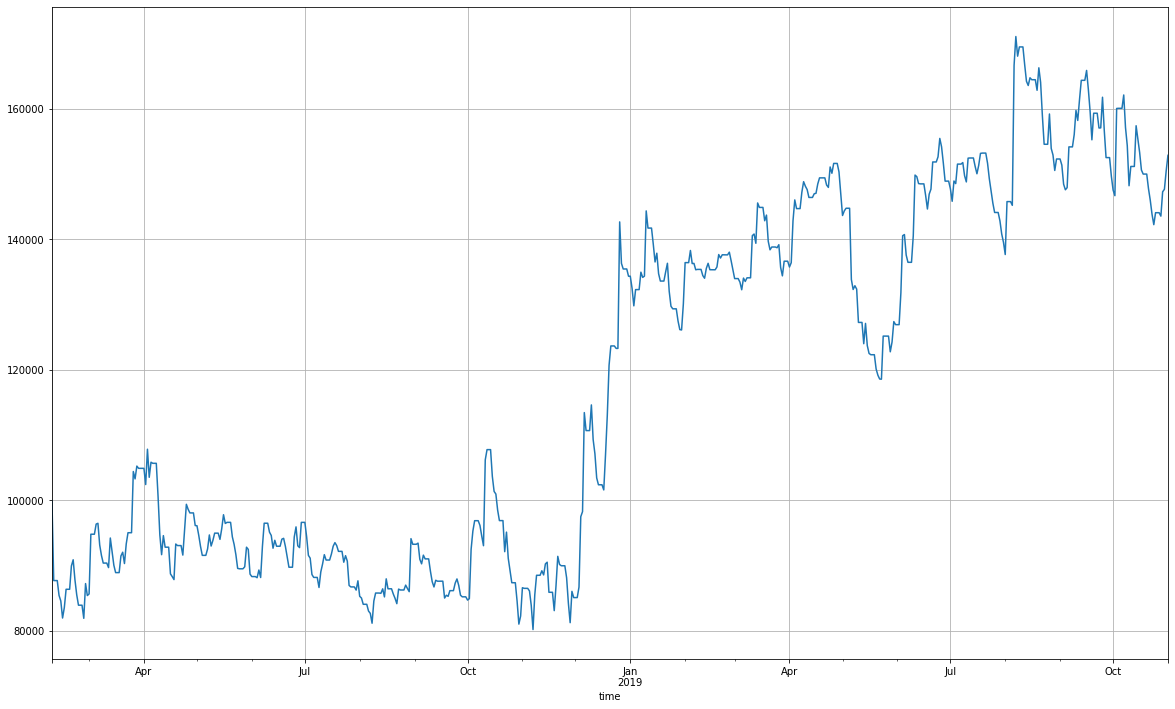

In [8]:
returns['dollars'].plot(figsize=(20,12), grid=True);

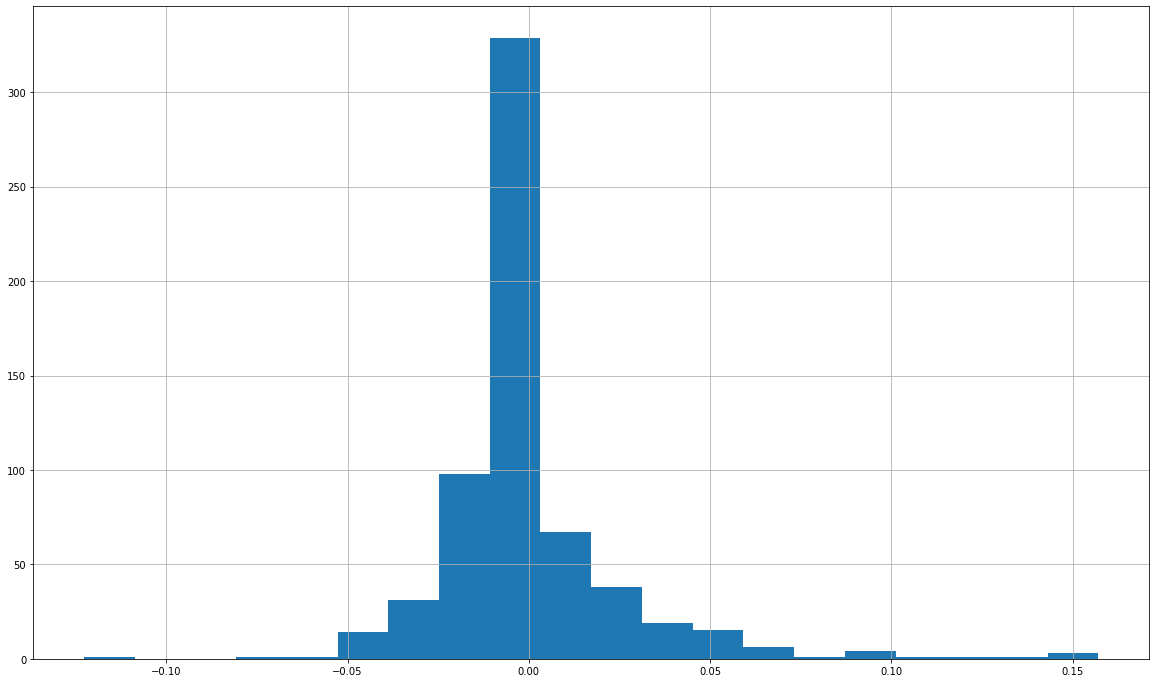

In [9]:
returns['returns'].hist(bins=20, figsize=(20,12), grid=True);

In [10]:
nq = df[df['contract'].str.startswith('NQ')]
nq

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 00:50:00,2019-11-07 17:08:06.388268,NQZ9,SELL,1,6304.175,[1],1,entry,1,1.3,USD,0.0,2019-11-07 17:08:06.388621,-3.02,-3.02,99996.98
2018-02-09 01:15:00,2019-11-07 17:08:06.513828,NQZ9,BUY,1,6346.150,[4],2,stop-out,4,1.3,USD,-839.5,2019-11-07 17:08:06.513884,-842.52,-851.58,99148.42
2018-02-09 16:50:00,2019-11-07 17:08:12.510550,NQZ9,SELL,1,6300.250,[30],33,entry,30,1.3,USD,0.0,2019-11-07 17:08:12.510911,-3.02,-4460.23,95539.77
2018-02-09 16:55:00,2019-11-07 17:08:12.649523,NQZ9,BUY,1,6348.625,[36],37,stop-out,36,1.3,USD,-967.5,2019-11-07 17:08:12.649564,-970.52,-7045.10,92954.90
2018-02-09 18:05:00,2019-11-07 17:08:13.916636,NQZ9,SELL,1,6280.100,[39],43,entry,39,1.3,USD,0.0,2019-11-07 17:08:13.916900,-3.02,-7799.16,92200.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 19:17:00,2019-11-07 20:41:57.349937,NQZ9,BUY,1,8069.025,[7890],9038,entry,7890,1.3,USD,0.0,2019-11-07 20:41:57.351742,-3.02,48335.37,148335.37
2019-10-30 19:31:00,2019-11-07 20:41:58.409876,NQZ9,SELL,1,8051.050,[7891],9039,stop-out,7891,1.3,USD,-359.5,2019-11-07 20:41:58.409960,-362.52,47972.85,147972.85
2019-10-30 19:57:00,2019-11-07 20:42:01.510386,NQZ9,BUY,1,8078.525,[7896],9047,entry,7896,1.3,USD,0.0,2019-11-07 20:42:01.512115,-3.02,47957.75,147957.75


In [11]:
nq['realizedPNL'].sum()

29340.379999999997

In [12]:
nq['realizedPNL_net'].sum()

26450.239999999976

In [13]:
df['symbol'] = df['contract'].str[:2]
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,,,
2018-02-09 00:50:00,2019-11-07 17:08:06.388268,NQZ9,SELL,1,6304.175,[1],1,entry,1,1.3,USD,0.0,2019-11-07 17:08:06.388621,-3.02,-3.02,99996.98,NQ
2018-02-09 00:58:00,2019-11-07 17:08:06.420664,NKDZ9,SELL,1,21102.500,[2],3,entry,2,1.3,USD,0.0,2019-11-07 17:08:06.420898,-3.02,-6.04,99993.96,NK
2018-02-09 01:12:00,2019-11-07 17:08:06.511802,GCZ9,BUY,1,1323.830,[3],5,entry,3,1.3,USD,0.0,2019-11-07 17:08:06.512038,-3.02,-9.06,99990.94,GC
2018-02-09 01:15:00,2019-11-07 17:08:06.513828,NQZ9,BUY,1,6346.150,[4],2,stop-out,4,1.3,USD,-839.5,2019-11-07 17:08:06.513884,-842.52,-851.58,99148.42,NQ
2018-02-09 01:16:00,2019-11-07 17:08:06.514725,NKDZ9,BUY,1,21230.000,[5],4,stop-out,5,1.3,USD,-637.5,2019-11-07 17:08:06.514772,-640.52,-1492.10,98507.90,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01 13:37:00,2019-11-07 20:43:27.790208,CLZ9,BUY,1,54.842,[7929],9082,entry,7929,1.3,USD,0.0,2019-11-07 20:43:27.791955,-3.02,53146.65,153146.65,CL
2019-11-01 13:39:00,2019-11-07 20:43:28.013105,ESZ9,BUY,1,3048.725,[7930],9084,entry,7930,1.3,USD,0.0,2019-11-07 20:43:28.014858,-3.02,53143.63,153143.63,ES
2019-11-01 14:36:00,2019-11-07 20:43:31.996491,YM DEC 19,BUY,1,27132.100,[7931],9086,entry,7931,1.3,USD,0.0,2019-11-07 20:43:31.998295,-3.02,53140.61,153140.61,YM


In [14]:
df.groupby('symbol').realizedPNL.sum()

symbol
CL     6593.67
ES    38511.39
GC     1306.41
GE     -687.92
NK    -3447.03
NQ    29340.38
YM    19659.67
ZB    -9114.14
ZF    -2188.65
ZN    -3169.55
Name: realizedPNL, dtype: float64

In [15]:
nq = df[df['symbol'] == 'NQ']

In [37]:
nq.price.count()

825

In [38]:
nq

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,
2018-02-09 16:50:00,NQZ9,SELL,1,6300.250,[1],1,entry,1,1.3,USD,0.0,-3.02,-3.02,99996.98,NQ
2018-02-09 16:55:00,NQZ9,BUY,1,6348.625,[2],2,stop-out,2,1.3,USD,-967.5,-970.52,-973.54,99026.46,NQ
2018-02-09 18:05:00,NQZ9,SELL,1,6280.100,[3],3,entry,3,1.3,USD,0.0,-3.02,-976.56,99023.44,NQ
2018-02-09 20:10:00,NQZ9,BUY,1,6325.850,[4],4,stop-out,4,1.3,USD,-915.0,-918.02,-1894.58,98105.42,NQ
2018-02-09 21:56:00,NQZ9,BUY,1,6427.825,[5],5,entry,5,1.3,USD,0.0,-3.02,-1897.60,98102.40,NQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 16:16:00,NQZ9,SELL,1,7609.825,[821],951,entry,821,1.3,USD,0.0,-3.02,40778.09,140778.09,NQ
2019-09-03 16:41:00,NQZ9,BUY,1,7639.275,[822],952,stop-out,822,1.3,USD,-589.0,-592.02,40186.07,140186.07,NQ
2019-09-03 19:51:00,NQZ9,SELL,1,7596.550,[823],953,entry,823,1.3,USD,0.0,-3.02,40183.05,140183.05,NQ


In [39]:
df.resample('D').last().price.count()

317

In [40]:
nq.price.count() / df.resample('D').last().price.count()

2.6025236593059935

In [41]:
df[df.reason == 'entry'].count()

contract           412
action             412
amount             412
price              412
exec_ids           412
order_id           412
reason             412
com_exec_id        412
commission         412
currency           412
realizedPNL        412
realizedPNL_net    412
cumsum             412
result             412
symbol             412
dtype: int64

In [42]:
df[df.reason != 'entry'].count()

contract           413
action             413
amount             413
price              413
exec_ids           413
order_id           413
reason             413
com_exec_id        413
commission         413
currency           413
realizedPNL        413
realizedPNL_net    413
cumsum             413
result             413
symbol             413
dtype: int64